In [96]:
from deep_translator import GoogleTranslator
import emot
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [22]:
customers_df = pd.read_csv("olist_customers_dataset.csv")
geolocation_df = pd.read_csv("olist_geolocation_dataset.csv")
order_items_df = pd.read_csv("olist_order_items_dataset.csv")
order_payments_df = pd.read_csv("olist_order_payments_dataset.csv")
order_reviews_df = pd.read_csv("olist_order_reviews_dataset.csv")
orders_df = pd.read_csv("olist_orders_dataset.csv")
products_df = pd.read_csv("olist_products_dataset.csv")
sellers_df = pd.read_csv("olist_sellers_dataset.csv")
product_category_name_translation_df = pd.read_csv(
    "product_category_name_translation.csv"
)

print("customers_df")
display(customers_df.head())
print("geolocation_df")
display(geolocation_df.head())
print("order_items_df")
display(order_items_df.head())
print("order_payments_df")
display(order_payments_df.head())
print("order_reviews_df")
display(order_reviews_df.head())
display(order_reviews_df.info())
print("orders_df")
display(orders_df.head())
display(orders_df.info())
print("products_df")
display(products_df.head())
print("sellers_df")
display(sellers_df.head())
print("product_category_name_translation_df")
display(product_category_name_translation_df.head())


customers_df


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


geolocation_df


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


order_items_df


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


order_payments_df


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


order_reviews_df


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


None

orders_df


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

products_df


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


sellers_df


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


product_category_name_translation_df


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [28]:
translator = GoogleTranslator(source="pt", target="en")
reviews = [
    [
        1,
        "Não é bom removedor de imperfeições na lata, nas peças plásticas remove bem pequenos arranhões "
        + "(arranhão de esponja). Mas a sujeira, principalmente poeira, gruda mais do que se não usar o produto. Não recomendo.",
    ],
    [
        1,
        "Quem vai arcar com o prejuízo? Simplesmente a embalagem da cera estava aberta",
    ],
    [
        1,
        "Os dois primeiros pacotes já vieram com os filmes queimados. estou muito triste, pois já troquei a "
        + "pilha e mesmo assim não funcionaram. como podem resolver meu problemas?",
    ],
    [
        1,
        "Nao consegui contactar o vendedor para esclarecer meu problema. Minhas fotos sairam pretas",
    ],
    [
        2,
        "Chegou rápido, mas não vi nenhum dos resultados mencionados na propaganda. Não gostei!",
    ],
    [
        2,
        "Não corrige nem os arranhões mais superficiais. É o barato que sai caro. Melhor comprar logo a cera da Johnson.",
    ],
    [
        2,
        "Não sei se foi um problema apenas com o kit que comprei mas mas fotos saem super borradas, e dois filmes "
        + "não apresentaram imagem. Depois compro outro kit para testar.",
    ],
    [
        2,
        "A foto não aparecia no filme, aconteci isso umas 3 vezes, perdi a foto e dinheiro, de resto funcionou normal!",
    ],
    [3, "O brilho até que é legal, mas não esperem nada mais além disso!!"],
    [
        3,
        "Produto ok, mas é melhor comprar uma cera de verdade. Da um pouco de brilho, mas não tira nem os riscos superficiais.",
    ],
    [
        3,
        "É um produto sensível e a caixa chegou amassada. Espero que não tenha chegado nos filmes. Mas agora é testar e "
        + "ver o que acontece. De resto, comprei com promoção, então valeu a pena.",
    ],
    [
        3,
        "Veio tudo certo e dentro do prazo. Os filmes funcionaram (basta ter paciência e manusear a instax com os ambientes "
        + "certos), mas a caixinha veio bem amassada, parece que não há cuidado no manuseio delas pra envio.",
    ],
    [
        4,
        "Apesar de ter carnaúba a cera é seca, não tem a mesma consistência das concorrentes mais caras, não dá aquele brilho, "
        + "talvez com politriz... mas é mais barato, então pelo valor tá bom.",
    ],
    [4, "Não dar tanto brilho como eu esperava , mas dá pra o gasto !"],
    [
        4,
        "Amei o produto, a unica coisa que me deixou um pouco triste foi que algumas fotos vieram queimadas.",
    ],
    [
        4,
        "O filme funcionou direitinho, mas achei as cores um pouco diferentes das que apareciam na imagem…. A entrega foi "
        + "muito rápida!",
    ],
    [
        5,
        "Chegou rápido, ótima cera, o preço está melhor do que comprar na minha cidade, e ainda frete grátis na porta de sua "
        + "casa, comprarei mais com certeza",
    ],
    [5, "Comparada aos produtos ditos da linha “premium” é um bom custo benefício."],
    [
        5,
        "Sempre compramos o filme, então nada de diferente de outros fornecedores. Com certeza vou comprar mais!",
    ],
    [
        5,
        "Não utilizei ainda pois ainda tem outro filme na câmera, chegou bem embalado e em perfeitas condições, validade "
        + "longe também.",
    ],
]
sentiment = SentimentIntensityAnalyzer()
text_blob_accuracy = 0
vader_sentiment_accuracy = 0

for review in reviews:
    review[1] = translator.translate(review[1])

for review in reviews:
    score = int(round((TextBlob(review[1]).sentiment.polarity + 1) * 2.5, 0))
    accuracy = 100 - (abs(score - review[0]) * 25)
    text_blob_accuracy += accuracy

text_blob_accuracy = text_blob_accuracy / len(reviews)

for review in reviews:
    score = int(round((sentiment.polarity_scores(review[1])["compound"] + 1) * 2.5, 0))
    accuracy = 100 - (abs(score - review[0]) * 25)
    vader_sentiment_accuracy += accuracy

vader_sentiment_accuracy = vader_sentiment_accuracy / len(reviews)

print(
    f"TextBlob accuracy: {round(text_blob_accuracy, 2)}%\nvaderSentiment accuracy: {round(vader_sentiment_accuracy, 2)}%"
)


TextBlob accuracy: 75.0%
vaderSentiment accuracy: 78.75%


In [134]:
emot_object = emot.core.emot()
lead_trail_space = re.compile(r"^(\s*)(.+?)(\s*)$")


def translate_comment(original_string):
    if not isinstance(original_string, str):
        return original_string

    emoji = emot_object.emoji(original_string)
    emoticons = emot_object.emoticons(original_string)
    all_emotes = [
        [emoji["value"][i], emoji["location"][i]] for i in range(len(emoji["value"]))
    ] + [
        [emoticons["value"][i], emoticons["location"][i]]
        for i in range(len(emoticons["value"]))
    ]

    if len(all_emotes) > 0:
        translated_string_list = []
        current_index = 0

        all_emotes.sort(key=lambda x: x[1][0])
    
        for emote in all_emotes:
            pre_emote = original_string[current_index : emote[1][0]]

            if re.search(r"[a-zA-Zà-üÀ-Ü]", pre_emote):
                lead_trail_space_match = lead_trail_space.match(pre_emote)

                if lead_trail_space_match is not None:
                    translated_string_list += [
                        lead_trail_space_match.group(1)
                        + translator.translate(lead_trail_space_match.group(2))
                        + lead_trail_space_match.group(3)
                    ]
                else:
                    translated_string_list += [pre_emote]
            else:
                translated_string_list += [pre_emote]

            translated_string_list += [emote[0]]

            current_index = emote[1][1]

            if emote == all_emotes[-1]:
                post_emote = original_string[current_index:]

                if re.search(r"[a-zA-Zà-üÀ-Ü]", post_emote):
                    lead_trail_space_match = lead_trail_space.match(post_emote)

                    if lead_trail_space_match is not None:
                        translated_string_list += [
                            lead_trail_space_match.group(1)
                            + translator.translate(lead_trail_space_match.group(2))
                            + lead_trail_space_match.group(3)
                        ]
                    else:
                        translated_string_list += [post_emote]
                else:
                    translated_string_list += [post_emote]

        return "".join(translated_string_list)
    else:
        if re.search(r"[a-zA-Zà-üÀ-Ü]", original_string):
            return translator.translate(original_string)
        else:
            return original_string
        


def generate_comment_score(title, message):
    if isinstance(title, str):
        title_score = int(
            round((sentiment.polarity_scores(title)["compound"] + 1) * 2.5, 0)
        )
        if isinstance(message, str):
            message_score = int(
                round((sentiment.polarity_scores(message)["compound"] + 1) * 2.5, 0)
            )
            score = int(round((title_score + message_score) / 2, 0))
        else:
            score = title_score
    else:
        score = int(
            round((sentiment.polarity_scores(message)["compound"] + 1) * 2.5, 0)
        )

    return 1 if score == 0 else score


In [138]:
if not os.path.isfile("review_comments_df.ftr"):
    review_comments_df = order_reviews_df.loc[
        ~order_reviews_df["review_comment_title"].isna()
        | ~order_reviews_df["review_comment_message"].isna()
    ][["review_score", "review_comment_title", "review_comment_message"]]
    review_comments_df["review_comment_score"] = 0
    review_comments_df["review_comment_title"] = review_comments_df.apply(
        lambda row: translate_comment(row["review_comment_title"]), axis=1
    )
    review_comments_df["review_comment_message"] = review_comments_df.apply(
        lambda row: translate_comment(row["review_comment_message"]), axis=1
    )
    review_comments_df["review_comment_score"] = review_comments_df.apply(
        lambda row: generate_comment_score(
            row["review_comment_title"], row["review_comment_message"]
        ),
        axis=1,
    )
    review_comments_df = review_comments_df.reset_index()

    review_comments_df.to_feather("review_comments_df.ftr")
else:
    review_comments_df = pd.read_feather("review_comments_df.ftr")

display(review_comments_df)


,index,review_score,review_comment_title,review_comment_message,review_comment_score
0,3,5,None,I received it well before the stipulated time.,3
1,4,5,None,Congratulations Lannister stores I loved shopp...,5
2,9,4,I recommend,efficient device. on the website the brand of ...,4
3,12,4,None,But a little slowing down... for the price it'...,4
4,15,5,highly recommend,"Reliable seller, ok product and delivery on time.",4
...,...,...,...,...,...
42701,99205,4,None,for this product I received according to the p...,2
42702,99208,5,None,Delivered within the time frame. The product a...,4
42703,99215,3,None,"The product was not sent with an invoice, ther...",3
42704,99221,5,None,"Excellent backpack, super fast delivery. I hig...",5


Correlation between review and comment scores: 0.6072365358340254


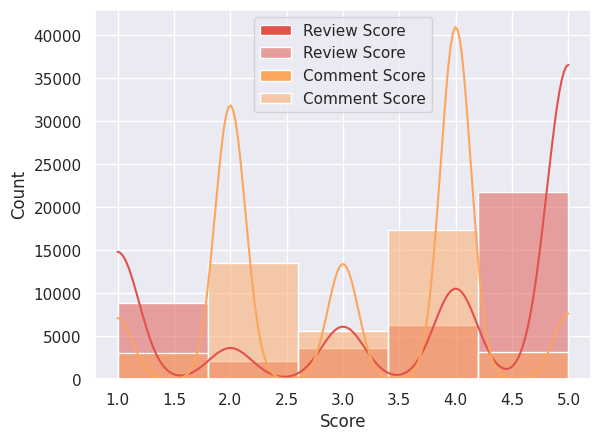

In [151]:
print(
    f"Correlation between review and comment scores: {review_comments_df['review_score'].corr(review_comments_df['review_comment_score'])}"
)
sns.set(style="darkgrid")
sns.set_palette("Spectral")
sns.histplot(
    data=review_comments_df, x="review_score", bins=5, label="Review Score", kde=True
)
sns.histplot(
    data=review_comments_df,
    x="review_comment_score",
    bins=5,
    label="Comment Score",
    kde=True,
)
plt.xlabel("Score")
plt.legend()
plt.show()
